In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import*

from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType

import pandas as pd

In [2]:
spark = SparkSession.builder.master("local[*]").appName("Test SQL app").getOrCreate()

Creating a Spark DataFrame

In [3]:
df = spark.read.json("capstone_files\cdw_sapp_custmer.json")
df.printSchema()
df.show()

root
 |-- APT_NO: string (nullable = true)
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_CITY: string (nullable = true)
 |-- CUST_COUNTRY: string (nullable = true)
 |-- CUST_EMAIL: string (nullable = true)
 |-- CUST_PHONE: long (nullable = true)
 |-- CUST_STATE: string (nullable = true)
 |-- CUST_ZIP: string (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)
 |-- MIDDLE_NAME: string (nullable = true)
 |-- SSN: long (nullable = true)
 |-- STREET_NAME: string (nullable = true)

+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|APT_NO|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN|      STREET_NAME|
+------+----------------+------------+---

Concatenate Apartment no and Street name of customer's Residence with comma as a seperator (Street, Apartment)

In [4]:
df_cust=df.toPandas() #converting spark datafram to pandas dataframe

In [5]:
df_cust.dtypes #checking data types

APT_NO            object
CREDIT_CARD_NO    object
CUST_CITY         object
CUST_COUNTRY      object
CUST_EMAIL        object
CUST_PHONE         int64
CUST_STATE        object
CUST_ZIP          object
FIRST_NAME        object
LAST_NAME         object
LAST_UPDATED      object
MIDDLE_NAME       object
SSN                int64
STREET_NAME       object
dtype: object

In [6]:
df_cust['CUST_ZIP']=df_cust['CUST_ZIP'].astype(int)

In [7]:
df_cust["FIRST_NAME"]=df_cust['FIRST_NAME'].str.title() #convert first name to title case
df_cust

,APT_NO,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,STREET_NAME
0,656,4210653310061055,Natchez,United States,AHooper@example.com,1237818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,Wm,123456100,Main Street North
1,829,4210653310102868,Wethersfield,United States,EHolman@example.com,1238933,CT,6109,Etta,Holman,2018-04-21T12:49:02.000-04:00,Brendan,123453023,Redwood Drive
2,683,4210653310116272,Huntley,United States,WDunham@example.com,1243018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,Ezequiel,123454487,12th Street East
3,253,4210653310195948,NewBerlin,United States,EHardy@example.com,1243215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,Trina,123459758,Country Club Road
4,301,4210653310356919,ElPaso,United States,WAyers@example.com,1242074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,May,123454431,Madison Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,882,4210653399559239,SiouxCity,United States,FCastle@example.com,1238344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,Jonah,123451589,Main Street South
948,470,4210653399650358,Summerville,United States,FBlock@example.com,1240420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,Aron,123457088,Glenwood Avenue
949,405,4210653399732638,Duluth,United States,DPruitt@example.com,1236149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,Lucas,123453259,Country Lane
950,15,4210653399859149,Rowlett,United States,EBeatty@example.com,1236886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,Susanna,123454047,8th Street


In [8]:
df_cust["MIDDLE_NAME"]=df_cust["MIDDLE_NAME"].str.lower() #convert middle name to lowercase
df_cust

,APT_NO,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,STREET_NAME
0,656,4210653310061055,Natchez,United States,AHooper@example.com,1237818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,wm,123456100,Main Street North
1,829,4210653310102868,Wethersfield,United States,EHolman@example.com,1238933,CT,6109,Etta,Holman,2018-04-21T12:49:02.000-04:00,brendan,123453023,Redwood Drive
2,683,4210653310116272,Huntley,United States,WDunham@example.com,1243018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,ezequiel,123454487,12th Street East
3,253,4210653310195948,NewBerlin,United States,EHardy@example.com,1243215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,trina,123459758,Country Club Road
4,301,4210653310356919,ElPaso,United States,WAyers@example.com,1242074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,may,123454431,Madison Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,882,4210653399559239,SiouxCity,United States,FCastle@example.com,1238344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,jonah,123451589,Main Street South
948,470,4210653399650358,Summerville,United States,FBlock@example.com,1240420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,aron,123457088,Glenwood Avenue
949,405,4210653399732638,Duluth,United States,DPruitt@example.com,1236149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,lucas,123453259,Country Lane
950,15,4210653399859149,Rowlett,United States,EBeatty@example.com,1236886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,susanna,123454047,8th Street


In [9]:
df_cust["LAST_NAME"]=df_cust["LAST_NAME"].str.title() 
df_cust

,APT_NO,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,STREET_NAME
0,656,4210653310061055,Natchez,United States,AHooper@example.com,1237818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,wm,123456100,Main Street North
1,829,4210653310102868,Wethersfield,United States,EHolman@example.com,1238933,CT,6109,Etta,Holman,2018-04-21T12:49:02.000-04:00,brendan,123453023,Redwood Drive
2,683,4210653310116272,Huntley,United States,WDunham@example.com,1243018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,ezequiel,123454487,12th Street East
3,253,4210653310195948,NewBerlin,United States,EHardy@example.com,1243215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,trina,123459758,Country Club Road
4,301,4210653310356919,ElPaso,United States,WAyers@example.com,1242074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,may,123454431,Madison Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,882,4210653399559239,SiouxCity,United States,FCastle@example.com,1238344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,jonah,123451589,Main Street South
948,470,4210653399650358,Summerville,United States,FBlock@example.com,1240420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,aron,123457088,Glenwood Avenue
949,405,4210653399732638,Duluth,United States,DPruitt@example.com,1236149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,lucas,123453259,Country Lane
950,15,4210653399859149,Rowlett,United States,EBeatty@example.com,1236886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,susanna,123454047,8th Street


In [10]:
df_cust['FULL_STREET_ADDRESS']=df_cust[['APT_NO','STREET_NAME']].apply(' , '.join, axis=1) #combine apt no and street name columns
df_cust

,APT_NO,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,STREET_NAME,FULL_STREET_ADDRESS
0,656,4210653310061055,Natchez,United States,AHooper@example.com,1237818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,wm,123456100,Main Street North,"656 , Main Street North"
1,829,4210653310102868,Wethersfield,United States,EHolman@example.com,1238933,CT,6109,Etta,Holman,2018-04-21T12:49:02.000-04:00,brendan,123453023,Redwood Drive,"829 , Redwood Drive"
2,683,4210653310116272,Huntley,United States,WDunham@example.com,1243018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,ezequiel,123454487,12th Street East,"683 , 12th Street East"
3,253,4210653310195948,NewBerlin,United States,EHardy@example.com,1243215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,trina,123459758,Country Club Road,"253 , Country Club Road"
4,301,4210653310356919,ElPaso,United States,WAyers@example.com,1242074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,may,123454431,Madison Street,"301 , Madison Street"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,882,4210653399559239,SiouxCity,United States,FCastle@example.com,1238344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,jonah,123451589,Main Street South,"882 , Main Street South"
948,470,4210653399650358,Summerville,United States,FBlock@example.com,1240420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,aron,123457088,Glenwood Avenue,"470 , Glenwood Avenue"
949,405,4210653399732638,Duluth,United States,DPruitt@example.com,1236149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,lucas,123453259,Country Lane,"405 , Country Lane"
950,15,4210653399859149,Rowlett,United States,EBeatty@example.com,1236886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,susanna,123454047,8th Street,"15 , 8th Street"


In [11]:
df_cust.drop(['STREET_NAME','APT_NO'], axis=1, inplace=True) #drop aptno and street name columns


In [12]:
#format phone number into (XXX)XXX-XXXX
#change data type from int to str
df_cust['CUST_PHONE']=df_cust['CUST_PHONE'].astype(str)

#[print (type(x)) for x in df_pandas['CUST_PHONE'].values]
first_three=df_cust['CUST_PHONE'].str[:3] #return first 3 digits
last_four=df_cust['CUST_PHONE'].str[3:] # return last four
for number in df_cust['CUST_PHONE']:
    df_cust['CUST_PHONE']='('+ '516'+ ')'+ first_three + '-' + last_four #change phont number format

df_cust




,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,FULL_STREET_ADDRESS
0,4210653310061055,Natchez,United States,AHooper@example.com,(516)123-7818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,wm,123456100,"656 , Main Street North"
1,4210653310102868,Wethersfield,United States,EHolman@example.com,(516)123-8933,CT,6109,Etta,Holman,2018-04-21T12:49:02.000-04:00,brendan,123453023,"829 , Redwood Drive"
2,4210653310116272,Huntley,United States,WDunham@example.com,(516)124-3018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,ezequiel,123454487,"683 , 12th Street East"
3,4210653310195948,NewBerlin,United States,EHardy@example.com,(516)124-3215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,trina,123459758,"253 , Country Club Road"
4,4210653310356919,ElPaso,United States,WAyers@example.com,(516)124-2074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,may,123454431,"301 , Madison Street"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,4210653399559239,SiouxCity,United States,FCastle@example.com,(516)123-8344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,jonah,123451589,"882 , Main Street South"
948,4210653399650358,Summerville,United States,FBlock@example.com,(516)124-0420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,aron,123457088,"470 , Glenwood Avenue"
949,4210653399732638,Duluth,United States,DPruitt@example.com,(516)123-6149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,lucas,123453259,"405 , Country Lane"
950,4210653399859149,Rowlett,United States,EBeatty@example.com,(516)123-6886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,susanna,123454047,"15 , 8th Street"


In [13]:
df_cust

,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,FULL_STREET_ADDRESS
0,4210653310061055,Natchez,United States,AHooper@example.com,(516)123-7818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,wm,123456100,"656 , Main Street North"
1,4210653310102868,Wethersfield,United States,EHolman@example.com,(516)123-8933,CT,6109,Etta,Holman,2018-04-21T12:49:02.000-04:00,brendan,123453023,"829 , Redwood Drive"
2,4210653310116272,Huntley,United States,WDunham@example.com,(516)124-3018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,ezequiel,123454487,"683 , 12th Street East"
3,4210653310195948,NewBerlin,United States,EHardy@example.com,(516)124-3215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,trina,123459758,"253 , Country Club Road"
4,4210653310356919,ElPaso,United States,WAyers@example.com,(516)124-2074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,may,123454431,"301 , Madison Street"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,4210653399559239,SiouxCity,United States,FCastle@example.com,(516)123-8344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,jonah,123451589,"882 , Main Street South"
948,4210653399650358,Summerville,United States,FBlock@example.com,(516)124-0420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,aron,123457088,"470 , Glenwood Avenue"
949,4210653399732638,Duluth,United States,DPruitt@example.com,(516)123-6149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,lucas,123453259,"405 , Country Lane"
950,4210653399859149,Rowlett,United States,EBeatty@example.com,(516)123-6886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,susanna,123454047,"15 , 8th Street"


In [14]:
#converting pandas dataframe back to spark dataframe
dfcustomer=spark.createDataFrame(df_cust) 
dfcustomer.printSchema()
dfcustomer.show()

C:\Spark\python\pyspark\sql\pandas\conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
C:\Spark\python\pyspark\sql\pandas\conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


root
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_CITY: string (nullable = true)
 |-- CUST_COUNTRY: string (nullable = true)
 |-- CUST_EMAIL: string (nullable = true)
 |-- CUST_PHONE: string (nullable = true)
 |-- CUST_STATE: string (nullable = true)
 |-- CUST_ZIP: long (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)
 |-- MIDDLE_NAME: string (nullable = true)
 |-- SSN: long (nullable = true)
 |-- FULL_STREET_ADDRESS: string (nullable = true)

+----------------+------------+-------------+--------------------+-------------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|   CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN| FULL_STREET_ADDRESS|
+----------------+------------+-------------+--------------------+-------

In [15]:
df_cust.to_json('clean_cdw_sapp_customer.json', orient='records')

In [16]:
#read branch.json and loading to spark dataframe
dfbranch= spark.read.json('capstone_files\cdw_sapp_branch.json')
dfbranch.printSchema()
dfbranch.show()
dfbranch.createTempView('branch_table')



root
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_ZIP: long (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)

+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_PHONE|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED|
+-----------------+-----------+------------+------------+------------+-------------------+----------+--------------------+
|        Lakeville|          1|Example Bank|  1234565276|          MN|       Bridle Court|     55044|2018-04-18T16:51:...|
|          Huntley|          2|Example Bank|  1234618993|          IL|  Washington Street|     60142|2018-04-18T16:51:...|
|SouthRichmondHill|          3|Exam

In [17]:
dfbranch.printSchema()

root
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_ZIP: long (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)



In [18]:
new_dfbranch=dfbranch.withColumn("BRANCH_PHONE2", concat(lit('(') , dfbranch['BRANCH_PHONE'].substr(1,3) , lit(')') , dfbranch['BRANCH_PHONE'].substr(4,3), lit('-'), dfbranch['BRANCH_PHONE'].substr(7,10))) #format phone number and assign it to new df variable

In [19]:
new_dfbranch=new_dfbranch.drop('BRANCH_PHONE') 

In [20]:
new_dfbranch=new_dfbranch.withColumnRenamed('BRANCH_PHONE2', 'BRANCH_PHONE') #rename column and assign it to new df variable

In [21]:
new_dfbranch.show()

+-----------------+-----------+------------+------------+-------------------+----------+--------------------+-------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED| BRANCH_PHONE|
+-----------------+-----------+------------+------------+-------------------+----------+--------------------+-------------+
|        Lakeville|          1|Example Bank|          MN|       Bridle Court|     55044|2018-04-18T16:51:...|(123)456-5276|
|          Huntley|          2|Example Bank|          IL|  Washington Street|     60142|2018-04-18T16:51:...|(123)461-8993|
|SouthRichmondHill|          3|Example Bank|          NY|      Warren Street|     11419|2018-04-18T16:51:...|(123)498-5926|
|       Middleburg|          4|Example Bank|          FL|   Cleveland Street|     32068|2018-04-18T16:51:...|(123)466-3064|
|    KingOfPrussia|          5|Example Bank|          PA|        14th Street|     19406|2018-04-18T16:51:...|(123)484-9701|
|       

In [22]:
new_dfbranch.withColumn('BRANCH_ZIP', when(new_dfbranch.BRANCH_ZIP.isNull(), '00000').otherwise(new_dfbranch.BRANCH_ZIP)).show() #if source value is null set default to (00000)

+-----------------+-----------+------------+------------+-------------------+----------+--------------------+-------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED| BRANCH_PHONE|
+-----------------+-----------+------------+------------+-------------------+----------+--------------------+-------------+
|        Lakeville|          1|Example Bank|          MN|       Bridle Court|     55044|2018-04-18T16:51:...|(123)456-5276|
|          Huntley|          2|Example Bank|          IL|  Washington Street|     60142|2018-04-18T16:51:...|(123)461-8993|
|SouthRichmondHill|          3|Example Bank|          NY|      Warren Street|     11419|2018-04-18T16:51:...|(123)498-5926|
|       Middleburg|          4|Example Bank|          FL|   Cleveland Street|     32068|2018-04-18T16:51:...|(123)466-3064|
|    KingOfPrussia|          5|Example Bank|          PA|        14th Street|     19406|2018-04-18T16:51:...|(123)484-9701|
|       

In [23]:
df_branch=new_dfbranch.toPandas()
df_branch.to_json('cleaned_cdw_sapp_branch.json',orient='records')

In [24]:
dfcredit= spark.read.json('capstone_files\cdw_sapp_credit.json')
dfcredit.printSchema()
dfcredit.show()

root
 |-- BRANCH_CODE: long (nullable = true)
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_SSN: long (nullable = true)
 |-- DAY: long (nullable = true)
 |-- MONTH: long (nullable = true)
 |-- TRANSACTION_ID: long (nullable = true)
 |-- TRANSACTION_TYPE: string (nullable = true)
 |-- TRANSACTION_VALUE: double (nullable = true)
 |-- YEAR: long (nullable = true)

+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|        114|4210653349028689|123459988| 14|    2|             1|       Education|             78.9|2018|
|         35|4210653349028689|123459988| 20|    3|             2|   Entertainment|            14.24|2018|
|        160|4210653349028689|123459988|  8|    7|             3|         Grocery|             5

In [25]:
df_credit=dfcredit.toPandas()

In [26]:
df_credit['DAY']=df_credit['DAY'].astype(str)
df_credit['MONTH']=df_credit['MONTH'].astype(str)
df_credit['YEAR']=df_credit['YEAR'].astype(str)

In [27]:
df_credit.dtypes

BRANCH_CODE            int64
CREDIT_CARD_NO        object
CUST_SSN               int64
DAY                   object
MONTH                 object
TRANSACTION_ID         int64
TRANSACTION_TYPE      object
TRANSACTION_VALUE    float64
YEAR                  object
dtype: object

In [28]:
date= df_credit['DAY']


for day in df_credit['DAY']:  #convert D to DD
    if len(day) < 2:
        df_credit['DAY']= date.str.rjust(2,'0')


month=df_credit['MONTH']

for months in df_credit['MONTH']: #convert M to MM
    if len(months) < 2:
        df_credit['MONTH']= month.str.rjust(2,'0')


df_credit


,BRANCH_CODE,CREDIT_CARD_NO,CUST_SSN,DAY,MONTH,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,YEAR
0,114,4210653349028689,123459988,14,02,1,Education,78.90,2018
1,35,4210653349028689,123459988,20,03,2,Entertainment,14.24,2018
2,160,4210653349028689,123459988,08,07,3,Grocery,56.70,2018
3,114,4210653349028689,123459988,19,04,4,Entertainment,59.73,2018
4,93,4210653349028689,123459988,10,10,5,Gas,3.59,2018
...,...,...,...,...,...,...,...,...,...
46689,49,4210653344660822,123451007,12,09,46690,Gas,66.20,2018
46690,168,4210653344660822,123451007,05,02,46691,Grocery,100.13,2018
46691,104,4210653344660822,123451007,16,12,46692,Test,35.83,2018
46692,32,4210653344660822,123451007,15,01,46693,Entertainment,90.99,2018


In [29]:
df_credit['TIMEID']=df_credit[['YEAR','MONTH','DAY']].apply(''.join, axis=1)

In [30]:
df_credit.drop(['DAY', 'MONTH', 'YEAR'], axis=1, inplace=True)
df_credit

,BRANCH_CODE,CREDIT_CARD_NO,CUST_SSN,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,TIMEID
0,114,4210653349028689,123459988,1,Education,78.90,20180214
1,35,4210653349028689,123459988,2,Entertainment,14.24,20180320
2,160,4210653349028689,123459988,3,Grocery,56.70,20180708
3,114,4210653349028689,123459988,4,Entertainment,59.73,20180419
4,93,4210653349028689,123459988,5,Gas,3.59,20181010
...,...,...,...,...,...,...,...
46689,49,4210653344660822,123451007,46690,Gas,66.20,20180912
46690,168,4210653344660822,123451007,46691,Grocery,100.13,20180205
46691,104,4210653344660822,123451007,46692,Test,35.83,20181216
46692,32,4210653344660822,123451007,46693,Entertainment,90.99,20180115


In [31]:
df_credit.to_json('cleaned_cdw_sapp_credit.json',orient='records')

In [32]:
#converting pandas dataframe back to spark dataframe
dfcredit=spark.createDataFrame(df_credit) 
dfcredit.printSchema()
dfcredit.show()

C:\Spark\python\pyspark\sql\pandas\conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
C:\Spark\python\pyspark\sql\pandas\conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


root
 |-- BRANCH_CODE: long (nullable = true)
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_SSN: long (nullable = true)
 |-- TRANSACTION_ID: long (nullable = true)
 |-- TRANSACTION_TYPE: string (nullable = true)
 |-- TRANSACTION_VALUE: double (nullable = true)
 |-- TIMEID: string (nullable = true)

+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|  TIMEID|
+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|        114|4210653349028689|123459988|             1|       Education|             78.9|20180214|
|         35|4210653349028689|123459988|             2|   Entertainment|            14.24|20180320|
|        160|4210653349028689|123459988|             3|         Grocery|             56.7|20180708|
|        114|4210653349028689|123459988|             4|   Entertainment|            59.73|

In [33]:
import configparser

config = configparser.ConfigParser()
with open('config.ini', 'w') as configfile:
   config.write(configfile)

#config.read('config.ini')

#host = config['DATABASE']['host']
#user = config['DATABASE']['user']
#password = config['DATABASE']['Pass1234']
#database = config['DATABASE']['database']




In [34]:
new_dfbranch.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "cdw_sapp_branch") \
  .option("user", "root") \
  .option("password", 'Pass1234') \
  .save()


In [35]:
dfcredit.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "cdw_sapp_credit_card") \
  .option("user", "root") \
  .option("password", "Pass1234") \
  .save()

In [36]:
dfcustomer.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "cdw_sapp_customer") \
  .option("user", "root") \
  .option("password", "Pass1234") \
  .save()

In [37]:
creditdf = spark.read.json('cleaned_cdw_sapp_credit.json')
creditdf.printSchema()

custdf = spark.read.json('clean_cdw_sapp_customer.json')
custdf.printSchema()

branchdf= spark.read.json('cleaned_cdw_sapp_branch.json')
branchdf.printSchema()

creditdf.createTempView("credit_table")
custdf.createTempView("customer_table")
branchdf.createTempView("branches_table")

root
 |-- BRANCH_CODE: long (nullable = true)
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_SSN: long (nullable = true)
 |-- TIMEID: string (nullable = true)
 |-- TRANSACTION_ID: long (nullable = true)
 |-- TRANSACTION_TYPE: string (nullable = true)
 |-- TRANSACTION_VALUE: double (nullable = true)

root
 |-- CREDIT_CARD_NO: string (nullable = true)
 |-- CUST_CITY: string (nullable = true)
 |-- CUST_COUNTRY: string (nullable = true)
 |-- CUST_EMAIL: string (nullable = true)
 |-- CUST_PHONE: string (nullable = true)
 |-- CUST_STATE: string (nullable = true)
 |-- CUST_ZIP: long (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- FULL_STREET_ADDRESS: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)
 |-- MIDDLE_NAME: string (nullable = true)
 |-- SSN: long (nullable = true)

root
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-

In [38]:
dfcust_credit =spark.sql("SELECT customer_table.CUST_ZIP, customer_table.CUST_STATE, customer_table.FIRST_NAME, customer_table.LAST_NAME, credit_table.BRANCH_CODE, credit_table.CREDIT_CARD_NO, credit_table.CUST_SSN, credit_table.TIMEID, \
credit_table.TRANSACTION_ID, credit_table.TRANSACTION_TYPE, credit_table.TRANSACTION_VALUE FROM customer_table \
left join credit_table ON customer_table.CREDIT_CARD_NO = credit_table.CREDIT_CARD_NO")

In [39]:
#join customer and credit table 
dfbranch_credit =spark.sql("SELECT branches_table.BRANCH_STATE, credit_table.BRANCH_CODE, credit_table.CREDIT_CARD_NO, credit_table.CUST_SSN, credit_table.TIMEID, \
credit_table.TRANSACTION_ID, credit_table.TRANSACTION_TYPE, credit_table.TRANSACTION_VALUE FROM branches_table \
left join credit_table ON branches_table.BRANCH_CODE = credit_table.BRANCH_CODE")


In [40]:
newdfcust_credit=dfcust_credit.toPandas() #convert to pandas

In [41]:
newdfbranch_credit=dfbranch_credit.toPandas()

In [42]:
newdfcust_credit.to_json('cleaned_cdw_sapp_credit_customer.json',orient='records') #save to json file

In [43]:
newdfbranch_credit.to_json('cleaned_cdw_sapp_branch_credit.json', orient='records')

# Transaction Detail Module

In [44]:
#6511
#month 11
def display_transactions_given_zip_month_year():
    import json
    new_credit=open('cleaned_cdw_sapp_credit_customer.json') #open json
    transactions= json.load(new_credit) 

    zip_code = int(input("Enter zip code: "))
    month = input("Enter month (01-12): ")
    year = input("Enter year (YYYY): ")
    transactions_by_zip_month_year = []
    for transaction in transactions:
        if transaction['CUST_ZIP']== zip_code and transaction['TIMEID'][4:6] == month and transaction['TIMEID'][:4] == year:
            transactions_by_zip_month_year.append(transaction)
    sorted_transactions = sorted(transactions_by_zip_month_year, key=lambda x: x["TIMEID"][6:8], reverse=True)
    if len(sorted_transactions) == 0:
        print("No transactions found for the given zip code and month/year.")
    else:
        print(sorted_transactions)
#display_transactions_given_zip_month_year()

In [45]:
def display_transaction_num_and_total_value_given_type():
    import json
    from functools import reduce
    credit=open('cleaned_cdw_sapp_credit.json') #open json
    transactions= json.load(credit)

    transaction_type= input('Type Transaction Type:').upper
    transactions_by_type=[]

    for transaction in transactions:
        if transaction['TRANSACTION_TYPE'] == transaction_type:
            transactions_by_type.append(transaction)
    transaction_values= [value.get('TRANSACTION_VALUE', None) for value in transactions_by_type]
    sum_values= reduce(lambda x, y:x+y,transaction_values)
    if len(transactions_by_type) == 0:
       print('No transactions found for given transaction type')
    else:
       print('Number of transactions:', len(transactions_by_type), f'Total transaction value:{sum_values:.2f}')
#display_transaction_num_and_total_value_given_type()

In [46]:
def display_transaction_num_and_total_value_given_state():
    import json
    from functools import reduce
    #read existing json file into a python object
    branch=open('cleaned_cdw_sapp_branch_credit.json') #open json
    transactions= json.load(branch) #load json into list
    state= input("Type State as 2 characters:").upper()
    transactions_by_state= []

    for transaction in transactions:
        if transaction['BRANCH_STATE'] == state:
            transactions_by_state.append(transaction)
    transaction_values= [value.get('TRANSACTION_VALUE', None) for value in transactions_by_state]
    sum_values= reduce(lambda x, y:x+y,transaction_values)
    if len(transactions_by_state) == 0:
       print('No transactions found for given transaction type')
    else:
       print('Number of transactions:', len(transactions_by_state), f'Total transaction value:{sum_values:.2f}')
#display_transaction_num_and_total_value_given_state()

# Customer Details Module

In [47]:
def check_account_details():
    import json
    #read existing json file into a python object
    with open('clean_cdw_sapp_customer.json') as cust:
        customers=json.load(cust)
        #prompt user to enter customers first and last name
    customer_firstname= input("Enter Customer's First Name:")
    customer_lastname= input("Enter Customer's Last Name:")
    for customer in customers:
        #check if customer exsits
        if customer['FIRST_NAME'] == customer_firstname and customer['LAST_NAME'] == customer_lastname:
            #print customer's details
            print('Customer Name:', customer['FIRST_NAME'], customer['MIDDLE_NAME'] , customer['LAST_NAME'])
            print('Customer Phone Number:', customer['CUST_PHONE'])
            print('Customer Email Address:', customer['CUST_EMAIL'])
            print('Credit Card Number:',customer['CREDIT_CARD_NO'])
            print('Customer Country:', customer['CUST_COUNTRY'])
            print('Customer Address:', customer['FULL_STREET_ADDRESS'], customer['CUST_CITY'], customer['CUST_STATE'], customer['CUST_ZIP'])
            print('Customer Social Security Number:', customer['SSN'])   
            break
    else:
        #print error message if customer name is not found
        print("Customer's Name not found in our records")
            
            
#check_account_details()

In [48]:
def modify_account_details():
    import json
    #read existing json file into a python object
    with open(r'C:\Users\Learner_XZHCG221\Perscholas_Capstone_Project\clean_cdw_sapp_customer.json', 'r') as cust_file:
        customers = json.load(cust_file)
    #prompt user to input customers first and last name    
    customer_firstname= input("Enter Customer's First Name:")
    customer_lastname= input("Enter Customer's Last Name:")
    for customer in customers:
        #filter to user's name that matches input
        if customer['FIRST_NAME'] == customer_firstname and customer['LAST_NAME'] == customer_lastname:
            #prompt user to select which account detail to modify
            print('Select account detail to modify...')
            print('1. Phone Number')
            print('2. Email Address')
            print('3. Credit Card Number')
            print('4. Address')
            print('5. Social Security')
            #modify the selected account detail of the customer
            choice= input('Type number of choice')
            if choice == '1':
                new_phone_number= input("Enter phone number (XXX)XXX-XXXX:")
                customer['CUST_PHONE']= new_phone_number
                print('Phone number updated successfully')
            elif choice == '2':
                new_email= input('Enter email address:')
                customer['CUST_EMAIL']= new_email
                print('Email updated successfully')
            elif choice == '3':
                new_cc= input('Enter cc number:')
                customer['CREDIT_CARD_NO']= new_cc
                print('Credit Card Number updated successfully')
            elif choice == '4':
                print('Select address detail to modify...')
                print('1. Full Street Address')
                print('2. City')
                print('3. State')
                print('4. Zip Code')
                choice2 = input('Type choice:')
                if choice2 == '1':
                    new_street_address = input('Enter full street address:')
                    customer['FULL_STREET_ADDRESS']=new_street_address
                    print('Street Address updated successfully')
                elif choice2 == '2':
                    new_city= input('Enter City:')
                    customer['CUST_CITY']=new_city
                    print('City updated successfully')
                elif choice2 == '3':
                    new_state= input('Enter State:')
                    customer['CUST_STATE']=new_state
                    print('State updated successfully')
                elif choice2 == '4':
                    new_zipcode= input('Enter Zip Code:')
                    customer['CUST_ZIP']=new_zipcode
                    print('Zip Code updated successfully')
            elif choice == '5':
                new_ss= input('Enter Social Security Number (XXXXXXXXX): ')
                customer['SSN']= new_ss
                print('Social Security Number updated successfully')
            else:
                print('Invalid choice')
            break
    else:
        print("Customer's name not found in records")  
    with open(r'C:\Users\Learner_XZHCG221\Perscholas_Capstone_Project\clean_cdw_sapp_customer.json', 'w') as cust_file:
        json.dump(customers, cust_file, indent=4)
modify_account_details()
        

Select account detail to modify...
1. Phone Number
2. Email Address
3. Credit Card Number
4. Address
5. Social Security
Phone number updated successfully


In [49]:
def generate_monthly_bill():
    import json
    from functools import reduce
    #read existing json file into a python object
    with open('cleaned_cdw_sapp_credit.json') as credit: #open json
        transactions= json.load(credit)
    # get cc number
    cc_num= input('Enter CC number:')
    #get month & year input
    month= input('Enter month 01-12:')
    year= input('Enter year (YYYY):')
    #create empty list
    total_transactions=[]
    #iterate through transactions
    for transaction in transactions:
        #filter transactions for specified cc # and month/year
        if transaction['CREDIT_CARD_NO'] == cc_num and transaction['TIMEID'][4:6] == month and transaction['TIMEID'][:4] == year:
            total_transactions.append(transaction)
    #iterate through list to get only transaction values
    transaction_values= [value.get('TRANSACTION_VALUE', None) for value in total_transactions]
    #sum transaction value
    total= reduce(lambda x, y:x+y,transaction_values)
    print(f'Monthly bill summary for credit card:{cc_num} in {month}/{year}:')
    #print(sum of transaction values rounded to seconded decimal)
    print(f'Total amount spent: ${total:.2f}')
            
#generate_monthly_bill()

In [50]:
def display_transaction_between_two_dates():
    import datetime
    import json
    with open('cleaned_cdw_sapp_credit_customer.json') as credit: #open json
        transactions= json.load(credit)

    fname= input("Enter First Name:")
    lname= input("Enter Last Name:")
    start_date_string= input("Enter Start Date (YYYYMMDD):")
    end_date_string= input("Enter End Date (YYYYMMDD)")
    start_date = datetime.datetime.strptime(start_date_string, '%Y%m%d')
    end_date = datetime.datetime.strptime(end_date_string, '%Y%m%d')
    transaction_dates=[]
    for transaction in transactions:
        if transaction['FIRST_NAME']== fname and transaction['LAST_NAME']== lname and start_date <= datetime.datetime.strptime(transaction['TIMEID'], '%Y%m%d') >= end_date:
            transaction_dates.append(transaction)
    sorted_transactions = sorted(transaction_dates, key=lambda x: x["TIMEID"][:8], reverse=True) 
    if len(sorted_transactions) == 0:
        print("No transactions found for the given Customers Name and month/year.")
    else:
        print(sorted_transactions)

#display_transaction_between_two_dates()

# VISUALIZATIONS

Find and plot which transaction type has a high rate of transactions.

Customer with the highest transaction amount: 6861


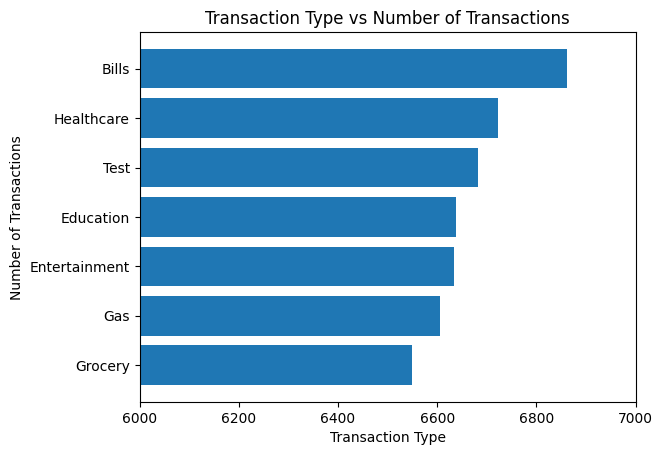

In [146]:
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
#group transactions by transaction type then count the number of transactions per type useing transaction id
transaction_count= df_credit.groupby('TRANSACTION_TYPE')['TRANSACTION_ID'].count().reset_index()

#sort transactions if count from greatest to least
transaction_count= transaction_count.sort_values('TRANSACTION_ID').reset_index()
#print(transaction_count)

print(f"Customer with the highest transaction amount: {transaction_count.iloc[6]['TRANSACTION_ID']}")

#plot graph
plt.barh(transaction_count['TRANSACTION_TYPE'], transaction_count['TRANSACTION_ID'])
#plt.xticks(rotation=90)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Transaction Type vs Number of Transactions')
plt.subplot().set_xlim([6000, 7000]) #zoom in to see the differenct more
plt.show()


Find and plot which state has a high number of customers.

Customer with the highest transaction amount: 96


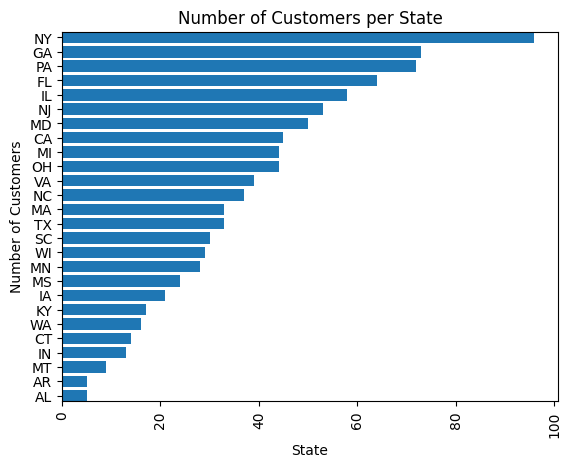

In [144]:
customer_count= df_cust.groupby('CUST_STATE')['FIRST_NAME'].count().reset_index()
#print(customer_count)
customer_count=customer_count.sort_values('FIRST_NAME').reset_index()
#print(customer_count)
print(f"Customer with the highest transaction amount: {customer_count.iloc[25]['FIRST_NAME']}")

plt.barh(customer_count['CUST_STATE'], customer_count['FIRST_NAME'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per State')
plt.margins(y=0) #remove white space
plt.show()


Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
hint(use CUST_SSN).

Customer with the highest transaction amount: 5633.07


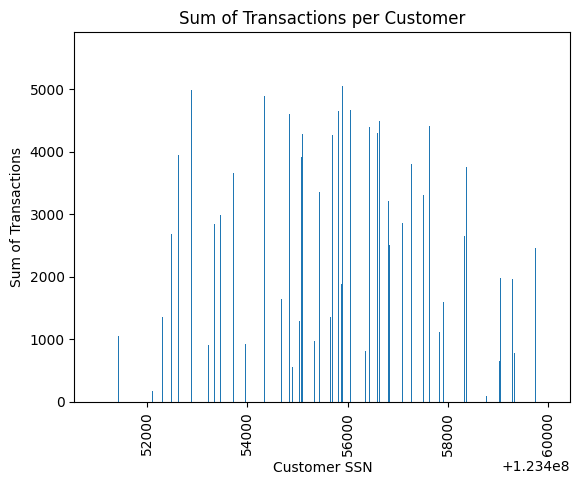

In [127]:
transaction_sum=df_credit.groupby('CUST_SSN')['TRANSACTION_VALUE'].sum().reset_index()

transaction_sum= transaction_sum.sort_values('TRANSACTION_VALUE', ascending=False)

print(f"Customer with the highest transaction amount: {transaction_sum.iloc[0]['TRANSACTION_VALUE']:.2f}")

plt.bar(transaction_sum['CUST_SSN'], transaction_sum['TRANSACTION_VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Customer SSN')
plt.ylabel('Sum of Transactions')
plt.title('Sum of Transactions per Customer')
#plt.subplot().set_ylim([5000, 5700])
plt.show()